In [4]:
import networkx as nx
import igraph as ig
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [5]:
df = pd.read_csv("data/employee_headers_long.csv")
df["pais_from"] = df["from"].str.slice(start=-6)
df["pais_to"] = df["to"].str.slice(start=-6)
employees = pd.read_excel("data/EmployeeRecords.xlsx")
employees["full_name"] = employees["FirstName"] + " " + employees["LastName"]
employees.head()

,LastName,FirstName,BirthDate,BirthCountry,Gender,CitizenshipCountry,CitizenshipBasis,CitizenshipStartDate,PassportCountry,PassportIssueDate,PassportExpirationDate,CurrentEmploymentType,CurrentEmploymentTitle,CurrentEmploymentStartDate,EmailAddress,MilitaryServiceBranch,MilitaryDischargeType,MilitaryDischargeDate,full_name
0,Bramar,Mat,1981-12-19,Tethys,Male,Tethys,BirthNation,1981-12-19,Tethys,2007-12-12,2017-12-11,Administration,Assistant to CEO,2005-07-01,Mat.Bramar@gastech.com.kronos,NaN,NaN,NaT,Mat Bramar
1,Ribera,Anda,1975-11-17,Tethys,Female,Tethys,BirthNation,1975-11-17,Tethys,2009-06-15,2019-06-14,Administration,Assistant to CFO,2009-10-30,Anda.Ribera@gastech.com.kronos,NaN,NaN,NaT,Anda Ribera
2,Pantanal,Rachel,1984-08-22,Tethys,Female,Tethys,BirthNation,1984-08-22,Tethys,2013-06-13,2023-06-12,Administration,Assistant to CIO,2013-10-01,Rachel.Pantanal@gastech.com.kronos,NaN,NaN,NaT,Rachel Pantanal
3,Lagos,Linda,1980-01-26,Tethys,Female,Tethys,BirthNation,1980-01-26,Tethys,2009-11-01,2019-10-31,Administration,Assistant to COO,2010-02-01,Linda.Lagos@gastech.com.kronos,NaN,NaN,NaT,Linda Lagos
4,Mies Haber,Ruscella,1964-04-26,Kronos,Female,Kronos,BirthNation,1964-04-26,NaN,NaT,NaT,Administration,Assistant to Engineering Group Manager,2003-04-02,Ruscella.Mies.Haber@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,1984-10-01,Ruscella Mies Haber


In [6]:
attr_data = employees[["full_name","BirthCountry", "CitizenshipCountry", "CurrentEmploymentTitle","MilitaryServiceBranch","MilitaryDischargeType", "EmailAddress"]]
def left_join(from_o_to, left_data, right_data):
    right_data=right_data.add_suffix("_" +from_o_to)
    return pd.merge(left_data, right_data, how="left", left_on = from_o_to, right_on = "EmailAddress_"+from_o_to)


df=left_join("from",df, attr_data)
df=left_join("to",df, attr_data)

,from,to,date,subject,pais_from,pais_to,full_name_from,BirthCountry_from,CitizenshipCountry_from,CurrentEmploymentTitle_from,MilitaryServiceBranch_from,MilitaryDischargeType_from,EmailAddress_from,full_name_to,BirthCountry_to,CitizenshipCountry_to,CurrentEmploymentTitle_to,MilitaryServiceBranch_to,MilitaryDischargeType_to,EmailAddress_to
0,Varja.Lagos@gastech.com.kronos,Varja.Lagos@gastech.com.kronos,1/6/2014 10:28,Patrol schedule changes,kronos,kronos,Varja Lagos,Tethys,Tethys,Badging Office,NaN,NaN,Varja.Lagos@gastech.com.kronos,Varja Lagos,Tethys,Tethys,Badging Office,NaN,NaN,Varja.Lagos@gastech.com.kronos
1,Varja.Lagos@gastech.com.kronos,Hennie.Osvaldo@gastech.com.kronos,1/6/2014 10:28,Patrol schedule changes,kronos,kronos,Varja Lagos,Tethys,Tethys,Badging Office,NaN,NaN,Varja.Lagos@gastech.com.kronos,Hennie Osvaldo,Kronos,Kronos,Perimeter Control,ArmedForcesOfKronos,GeneralDischarge,Hennie.Osvaldo@gastech.com.kronos
2,Varja.Lagos@gastech.com.kronos,Loreto.Bodrogi@gastech.com.kronos,1/6/2014 10:28,Patrol schedule changes,kronos,kronos,Varja Lagos,Tethys,Tethys,Badging Office,NaN,NaN,Varja.Lagos@gastech.com.kronos,Loreto Bodrogi,Kronos,Kronos,Site Control,ArmedForcesOfKronos,HonorableDischarge,Loreto.Bodrogi@gastech.com.kronos
3,Varja.Lagos@gastech.com.kronos,Inga.Ferro@gastech.com.kronos,1/6/2014 10:28,Patrol schedule changes,kronos,kronos,Varja Lagos,Tethys,Tethys,Badging Office,NaN,NaN,Varja.Lagos@gastech.com.kronos,Inga Ferro,Kronos,Kronos,Site Control,ArmedForcesOfKronos,GeneralDischarge,Inga.Ferro@gastech.com.kronos
4,Brand.Tempestad@gastech.com.kronos,Birgitta.Frente@gastech.com.kronos,1/6/2014 10:35,Wellhead flow rate data,kronos,kronos,Brand Tempestad,Tethys,Tethys,Drill Technician,NaN,NaN,Brand.Tempestad@gastech.com.kronos,Birgitta Frente,Tethys,Tethys,Geologist,NaN,NaN,Birgitta.Frente@gastech.com.kronos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,Albina.Hafon@gastech.com.kronos,Valeria.Morlun@gastech.com.kronos,1/17/2014 20:46,RE: Traffic advisory for today,kronos,kronos,Albina Hafon,Kronos,Kronos,Truck Driver,ArmedForcesOfKronos,GeneralDischarge,Albina.Hafon@gastech.com.kronos,Valeria Morlun,Kronos,Kronos,Truck Driver,ArmedForcesOfKronos,HonorableDischarge,Valeria.Morlun@gastech.com.kronos
8986,Albina.Hafon@gastech.com.kronos,Cecilia.Morluniau@gastech.com.kronos,1/17/2014 20:46,RE: Traffic advisory for today,kronos,kronos,Albina Hafon,Kronos,Kronos,Truck Driver,ArmedForcesOfKronos,GeneralDischarge,Albina.Hafon@gastech.com.kronos,Cecilia Morluniau,Kronos,Kronos,Truck Driver,ArmedForcesOfKronos,GeneralDischarge,Cecilia.Morluniau@gastech.com.kronos
8987,Albina.Hafon@gastech.com.kronos,Henk.Mies@gastech.com.kronos,1/17/2014 20:46,RE: Traffic advisory for today,kronos,kronos,Albina Hafon,Kronos,Kronos,Truck Driver,ArmedForcesOfKronos,GeneralDischarge,Albina.Hafon@gastech.com.kronos,Henk Mies,Kronos,Kronos,Truck Driver,ArmedForcesOfKronos,HonorableDischarge,Henk.Mies@gastech.com.kronos
8988,Albina.Hafon@gastech.com.kronos,Dylan.Scozzese@gastech.com.kronos,1/17/2014 20:46,RE: Traffic advisory for today,kronos,kronos,Albina Hafon,Kronos,Kronos,Truck Driver,ArmedForcesOfKronos,GeneralDischarge,Albina.Hafon@gastech.com.kronos,Dylan Scozzese,Kronos,Kronos,Truck Driver,ArmedForcesOfKronos,HonorableDischarge,Dylan.Scozzese@gastech.com.kronos


In [7]:
nodos = pd.Series(np.unique(df[['to', 'from']].values), name="nodos").to_frame()
nodos=pd.merge(nodos, attr_data, how="left",left_on ="nodos",right_on="EmailAddress")

,nodos,full_name,BirthCountry,CitizenshipCountry,CurrentEmploymentTitle,MilitaryServiceBranch,MilitaryDischargeType,EmailAddress
0,Ada.Campo-Corrente@gastech.com.kronos,Ada Campo-Corrente,Tethys,Tethys,SVP/CIO,NaN,NaN,Ada.Campo-Corrente@gastech.com.kronos
1,Adan.Morlun@gastech.com.kronos,Adan Morlun,Kronos,Kronos,Truck Driver,ArmedForcesOfKronos,HonorableDischarge,Adan.Morlun@gastech.com.kronos
2,Adra.Nubarron@gastech.com.kronos,Adra Nubarron,Tethys,Tethys,Geologist,NaN,NaN,Adra.Nubarron@gastech.com.kronos
3,Albina.Hafon@gastech.com.kronos,Albina Hafon,Kronos,Kronos,Truck Driver,ArmedForcesOfKronos,GeneralDischarge,Albina.Hafon@gastech.com.kronos
4,Anda.Ribera@gastech.com.kronos,Anda Ribera,Tethys,Tethys,Assistant to CFO,NaN,NaN,Anda.Ribera@gastech.com.kronos


In [8]:
G = nx.DiGraph()
for index, row in nodos.iterrows():
    G.add_node(row['full_name'], birth_country=row['BirthCountry'],
              citizenship_country = row['CitizenshipCountry'],
              curr_employment = row['CurrentEmploymentTitle'],
              military_service = row['MilitaryServiceBranch'],
              military_discharge = row['MilitaryDischargeType'])

In [9]:
df = df[df.MilitaryServiceBranch_from.notnull() | df.MilitaryServiceBranch_to.notnull()]

In [10]:
for index, row in df.iterrows():
    G.add_edge(row["full_name_from"], row["full_name_to"])

TypeError: draw_networkx_labels() missing 1 required positional argument: 'pos'

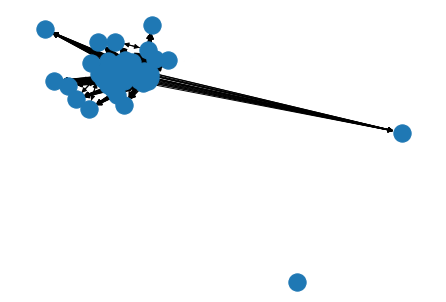

In [27]:
nx.draw_spring(G)
nx.draw_networkx_labels(G)

In [13]:
oraciones = pd.read_csv("data/oraciones.csv")
oraciones = oraciones[oraciones.personas.notnull()]

,noticia,medio,autor,titulo,fecha,lugar,oracion,sustantivos,adjetivos,verbos,personas,organizaciones,lugares,fechas,geopoliticos,eventos,polaridad,subjetividad
3,454.txt,News Online Today,NaN,LEADERSHIP CHANGE FOR PO,20090621,"ABILA, Krono","Following the unexpected death of Elian Karel,...","death,leadership,role",unexpected,"follow,take","Elian Karel,Silvia Marek",Kronos,NaN,NaN,NaN,NaN,0.050000,0.550000
4,454.txt,News Online Today,NaN,LEADERSHIP CHANGE FOR PO,20090621,"ABILA, Krono",Elian Karel died while in police custody on 19...,"police,custody",NaN,die,Elian Karel,NaN,NaN,19 June,NaN,NaN,0.000000,0.000000
10,544.txt,News Online Today,NaN,Activists Disrupt Traffic Near Tiskele Bend Fi...,20010831,"ABILA, Kronos","The protestors, members of the activist group ...","protestor,member,activist,group,sign,water,yea...",old,"hold,read,drill,poison,remember,become","Juliana,Juliana Vann","Protectors of Kronos,the Protectors of Kronos",NaN,"10 year old,1998",NaN,NaN,0.100000,0.200000
11,410.txt,News Online Today,NaN,LANDSLIDE VICTORY FOR PRESIDENT KAPELOU,20001002,"ABILA, Kronos",The people of Kronos have overwhelmingly elect...,people,new,elect,Dorel Kapelou II,NaN,NaN,NaN,Kronos,NaN,0.318182,0.727273
12,410.txt,News Online Today,NaN,LANDSLIDE VICTORY FOR PRESIDENT KAPELOU,20001002,"ABILA, Kronos",Former President Luis Araullo conceded defeat ...,"defeat,yesterday,return","former,early,strong","concede,come","Luis Araullo,Kapelou II",NaN,NaN,yesterday,NaN,NaN,0.177778,0.344444


In [71]:
oraciones_long = pd.concat([oraciones.loc[:, oraciones.columns != 'sustantivos'], 
          oraciones["sustantivos"].str.split(",", expand = True)], axis = 1)
oraciones_long=pd.melt(oraciones_long, id_vars=["noticia","medio","autor", "titulo","fecha","lugar","oracion","adjetivos",
                                "verbos","personas","organizaciones","lugares","fechas","geopoliticos","eventos","polaridad",
                                 "subjetividad"], value_name="sustantivo")

,noticia,medio,autor,titulo,fecha,lugar,oracion,adjetivos,verbos,personas,organizaciones,lugares,fechas,geopoliticos,eventos,polaridad,subjetividad,variable,sustantivo
0,454.txt,News Online Today,NaN,LEADERSHIP CHANGE FOR PO,20090621,"ABILA, Krono","Following the unexpected death of Elian Karel,...",unexpected,"follow,take","Elian Karel,Silvia Marek",Kronos,NaN,NaN,NaN,NaN,0.050000,0.550000,0,death
1,454.txt,News Online Today,NaN,LEADERSHIP CHANGE FOR PO,20090621,"ABILA, Krono",Elian Karel died while in police custody on 19...,NaN,die,Elian Karel,NaN,NaN,19 June,NaN,NaN,0.000000,0.000000,0,police
2,544.txt,News Online Today,NaN,Activists Disrupt Traffic Near Tiskele Bend Fi...,20010831,"ABILA, Kronos","The protestors, members of the activist group ...",old,"hold,read,drill,poison,remember,become","Juliana,Juliana Vann","Protectors of Kronos,the Protectors of Kronos",NaN,"10 year old,1998",NaN,NaN,0.100000,0.200000,0,protestor
3,410.txt,News Online Today,NaN,LANDSLIDE VICTORY FOR PRESIDENT KAPELOU,20001002,"ABILA, Kronos",The people of Kronos have overwhelmingly elect...,new,elect,Dorel Kapelou II,NaN,NaN,NaN,Kronos,NaN,0.318182,0.727273,0,people
4,410.txt,News Online Today,NaN,LANDSLIDE VICTORY FOR PRESIDENT KAPELOU,20001002,"ABILA, Kronos",Former President Luis Araullo conceded defeat ...,"former,early,strong","concede,come","Luis Araullo,Kapelou II",NaN,NaN,yesterday,NaN,NaN,0.177778,0.344444,0,defeat


In [188]:
def long_df(columna_long, df): 
    df_long = pd.concat([df.loc[:, df.columns != columna_long],
                       df[columna_long].str.split(",", expand = True)], axis = 1)
    df_long=pd.melt(df_long, id_vars = [x for x in df.columns if x != columna_long],
                   value_name = columna_long)
    return df_long

In [208]:
oraciones_long = long_df("sustantivos",oraciones)
oraciones_long

,noticia,medio,autor,titulo,fecha,lugar,oracion,adjetivos,verbos,personas,organizaciones,lugares,fechas,geopoliticos,eventos,polaridad,subjetividad,variable,sustantivos
0,454.txt,News Online Today,NaN,LEADERSHIP CHANGE FOR PO,20090621,"ABILA, Krono","Following the unexpected death of Elian Karel,...",unexpected,"follow,take","Elian Karel,Silvia Marek",Kronos,NaN,NaN,NaN,NaN,0.050000,0.550000,0,death
1,454.txt,News Online Today,NaN,LEADERSHIP CHANGE FOR PO,20090621,"ABILA, Krono",Elian Karel died while in police custody on 19...,NaN,die,Elian Karel,NaN,NaN,19 June,NaN,NaN,0.000000,0.000000,0,police
2,544.txt,News Online Today,NaN,Activists Disrupt Traffic Near Tiskele Bend Fi...,20010831,"ABILA, Kronos","The protestors, members of the activist group ...",old,"hold,read,drill,poison,remember,become","Juliana,Juliana Vann","Protectors of Kronos,the Protectors of Kronos",NaN,"10 year old,1998",NaN,NaN,0.100000,0.200000,0,protestor
3,410.txt,News Online Today,NaN,LANDSLIDE VICTORY FOR PRESIDENT KAPELOU,20001002,"ABILA, Kronos",The people of Kronos have overwhelmingly elect...,new,elect,Dorel Kapelou II,NaN,NaN,NaN,Kronos,NaN,0.318182,0.727273,0,people
4,410.txt,News Online Today,NaN,LANDSLIDE VICTORY FOR PRESIDENT KAPELOU,20001002,"ABILA, Kronos",Former President Luis Araullo conceded defeat ...,"former,early,strong","concede,come","Luis Araullo,Kapelou II",NaN,NaN,yesterday,NaN,NaN,0.177778,0.344444,0,defeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82411,312.txt,Worldwise,NaN,Araullo announces the new construction of hospita,19951122,"ABILA, Kronos","In its advertisement of the new construction, ...","new,foreign,large","say,go,pay",Araullo,NaN,NaN,NaN,NaN,NaN,0.075216,0.336039,47,None
82412,228.txt,Worldwise,NaN,The Minister for health receives threats of PO,20120308,"ABILA, Kronos",The sources of police force informed that Kron...,"first,several,threatening","inform,hold,receive,come",Vincent Kapelou,POK,NaN,NaN,NaN,NaN,0.125000,0.166667,47,None
82413,228.txt,Worldwise,NaN,The Minister for health receives threats of PO,20120308,"ABILA, Kronos","""I guess that they become desperate for the at...",desperate,"guess,become,call",Vincent Kapelou,NaN,NaN,NaN,NaN,NaN,-0.600000,1.000000,47,None
82414,228.txt,Worldwise,NaN,The Minister for health receives threats of PO,20120308,"ABILA, Kronos",I doubled the size of my force of safety and s...,NaN,"double,send,prolong,name","Kapelou,Cesare Nespola",NaN,NaN,"39,2001",NaN,NaN,0.100000,1.000000,47,None


In [205]:
df_personas = long_df("personas", oraciones)
df_personas = long_df("sustantivos",df_personas)
df_personas=df_personas[["noticia","sustantivos","personas", "fecha"]]
df_personas=df_personas[~df_personas.sustantivos.isnull() & ~df_personas.personas.isnull()]
df_personas[-df_personas.personas.isin(["Jr."])]

,noticia,sustantivos,personas,fecha
0,454.txt,death,Elian Karel,20090621
1,454.txt,police,Elian Karel,20090621
2,544.txt,protestor,Juliana,20010831
3,410.txt,people,Dorel Kapelou II,20001002
4,410.txt,defeat,Luis Araullo,20001002
...,...,...,...,...
1187837,784.txt,fuel,Jr.,19840505
1189554,784.txt,fuel,Sanjorge,19840505
1211875,784.txt,resource,Sten Sanjorge,19840505
1213592,784.txt,resource,Jr.,19840505


In [187]:

df_personas=df_personas[["noticia", "personas"]]
df_personas=df_personas[df_personas.personas.notnull()].drop_duplicates().sort_values("noticia")
df_personas["fl_fullname"] = df_personas.personas.str.contains(" ")
df_personas=df_personas[df_personas.fl_fullname==True]
df_personas["fl_relacion"] = 1
exclusiones = ["Sr", "Jr", "Jr.","Jr.", None]
df_personas=df_personas[~df_personas.personas.isin(exclusiones)]
df_personas=pd.pivot_table(df_personas, values="fl_relacion",columns=["noticia"], index=["personas"], 
                           aggfunc=np.sum, fill_value=0)
for c in df_personas.columns:
    if df_personas[c].sum()<2: 
        df_personas=df_personas.drop(c, axis = 1)

In [184]:
df_personas


noticia,0.txt,1.txt,102.txt,107.txt,111.txt,116.txt,122.txt,123.txt,126.txt,127.txt,...,824.txt,826.txt,827.txt,834.txt,836.txt,837.txt,839.txt,86.txt,88.txt,93.txt
personas,,,,,,,,,,,,,,,,,,,,,
Jr,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Jr.,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
Sr,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANDER-DERDE DEGREE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Abila Kronos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
the Hank Fluss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
the Kriste Brontes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
the Orhan Strum,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
import spacy